# IMPLEMENTATION OF OUR OWN AI ALGORITHM

Erfasser :

| Name | Matrikelnummer | E-Mail |
| :- | :- | :- |
| **Muhammad Abiyyu Mufti Hanif** | 60750 | hamu1013@h-ka.de |
| **Davin Farrell Lukito** | 75420 | luda1013@h-ka.de |

In this work, we are implementing 4 AI Methods:
- Decision Tree
- Random Forest
- K - Nearest Neighbor
- Convolutional Neural Networks


## Loading Data from Image Resources

In [1]:
# listing all images inside the resources!
from our_own_ai_process import OurDecisionTree, OurRandomForrest, OurKNearestNeighbour, OurCNN
from preprocessing import ImageResizer, FeatureExtraction, SimpleDatasetLoader
from imutils import paths
from preprocessing.image_to_array import ImageToArrayPreprocessor

In [2]:
# listing all images inside the resources!
imagePaths = list(paths.list_images("resources/"))
# initialize the image resizer, load the dataset from disk, and reshape the data matrix
sp = ImageResizer(256, 256)
# another image resizer for data in cnn
sp2 = ImageResizer(32, 32)
# initialize the feature extractor that will save it to csv file
f_ext = FeatureExtraction()
# initialize the converter to array using keras, will be use in cnn
iap = ImageToArrayPreprocessor()

# initialize data set loader that will load the images and do the preprocessing before it
sdl = SimpleDatasetLoader(preprocessors=[sp, f_ext, sp2, iap])

[INFO] loading images...
[INFO] processed 100/800
[INFO] processed 200/800
[INFO] processed 300/800
[INFO] processed 400/800
[INFO] processed 500/800
[INFO] processed 600/800
[INFO] processed 700/800
[INFO] processed 800/800


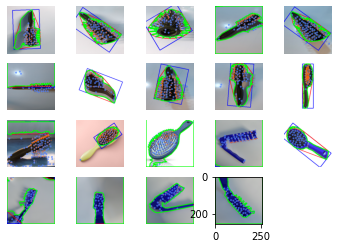

In [3]:
print("[INFO] loading images...")
# load the images
(data, label) = sdl.load(imagePaths, verbose=100, show=20)

In [4]:
# extraction direct to panda data frame
df = f_ext.extract_to_panda(label)
df.sample(10)
# extract to the csv file
# uncomment to extract to a csv file
# f_ext.extract_to_table("features.csv", labels)

,n_corner,n_h_corner,n_contour,a_rect,a_hull,a_approx,l_perimeters,wide/length,perim/a_rect,perim/a_hull,...,corner/a_hull,corner/a_appx,corner/l_perim,h_corner/a_rect,h_corner/a_hull,h_corner/a_appx,h_corner/l_perim,extent,solidity,labels
671,92,1059,14,65025.000000,65025.0,57556.5,1568.482317,1.000000,0.024121,0.024121,...,0.001415,0.001598,0.058655,0.016286,0.016286,0.018399,0.675175,0.885144,0.885144,1
146,100,585,13,65025.000000,64818.5,38606.0,1814.749343,1.000000,0.027908,0.027997,...,0.001543,0.002590,0.055104,0.008997,0.009025,0.015153,0.322359,0.593710,0.595602,0
14,60,440,14,65025.000000,64292.0,64132.5,1015.899495,1.000000,0.015623,0.015801,...,0.000933,0.000936,0.059061,0.006767,0.006844,0.006861,0.433114,0.986275,0.997519,0
211,50,264,2,18297.949064,14442.0,12087.5,682.991983,4.482075,0.037326,0.047292,...,0.003462,0.004137,0.073207,0.014428,0.018280,0.021841,0.386535,0.660593,0.836969,0
594,37,112,3,65025.000000,65025.0,65017.0,1025.656854,1.000000,0.015773,0.015773,...,0.000569,0.000569,0.036074,0.001722,0.001722,0.001723,0.109198,0.999877,0.999877,1
507,51,218,4,65025.000000,65025.0,48214.5,1658.859953,1.000000,0.025511,0.025511,...,0.000784,0.001058,0.030744,0.003353,0.003353,0.004521,0.131416,0.741476,0.741476,1
741,42,275,5,9417.000000,8131.5,6380.5,597.480229,5.093023,0.063447,0.073477,...,0.005165,0.006583,0.070295,0.029203,0.033819,0.043100,0.460266,0.677551,0.784665,1
785,36,417,2,8968.821070,8267.0,7818.5,546.249781,0.169359,0.060905,0.066076,...,0.004355,0.004604,0.065904,0.046494,0.050442,0.053335,0.763387,0.871742,0.945748,1
490,37,292,2,12567.118770,11616.5,11311.5,641.050858,5.300913,0.051010,0.055185,...,0.003185,0.003271,0.057718,0.023235,0.025137,0.025814,0.455502,0.900087,0.973744,1
635,51,434,2,65025.000000,65025.0,55027.0,1731.536140,1.000000,0.026629,0.026629,...,0.000784,0.000927,0.029454,0.006674,0.006674,0.007887,0.250644,0.846244,0.846244,1


## Decision Tree

In [5]:
# Decision Tree with max depth 10
ODT = OurDecisionTree(depth=10)
ODT.fit(df, 0.1)
ODT.train()
# ODT.plot_tree()

In [6]:
ODT.predict()
(a, b, c) = ODT.review()
print("Decision Tree Report")
print("Accuracy", a)
print(b)
print("Confusion Matrx:\n", c)

Decision Tree Report
Accuracy 0.7375
              precision    recall  f1-score   support

       brush       0.80      0.72      0.76        46
        comb       0.67      0.76      0.71        34

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.75      0.74      0.74        80

Confusion Matrx:
 [[33 13]
 [ 8 26]]


## Random Forest

In [7]:
# Random forest with 5 trees and depth 10
ORF = OurRandomForrest(n_trees=5, depth=10)
ORF.fit(df, 0.1)
ORF.train()
ORF.predict()
(a, b, c) = ORF.review()
print("Random Forest Report")
print("Accuracy", a)
print(b)
print("Confusion Matrx:\n", c)

Random Forest Report
Accuracy 0.7625
              precision    recall  f1-score   support

       brush       0.78      0.76      0.77        41
        comb       0.75      0.77      0.76        39

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80

Confusion Matrx:
 [[31 10]
 [ 9 30]]


## K-Nearest Neighbor

In [8]:
# K-NN with 5 K and euclidean distance calculation
fiveNearestNeighbour = OurKNearestNeighbour(5, "euclidean")
fiveNearestNeighbour.fit(df, 0.10)
fiveNearestNeighbour.predict()
(a, b, c) = fiveNearestNeighbour.review()
print("KNN Report")
print("Accuracy", a)
print(b)
print("Confusion Matrx:\n", c)

KNN Report
Accuracy 0.8875
              precision    recall  f1-score   support

       brush       0.80      0.97      0.88        34
        comb       0.97      0.83      0.89        46

    accuracy                           0.89        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.89      0.89        80

Confusion Matrx:
 [[33  1]
 [ 8 38]]


## Convolutional Neural Networks

In [9]:
# Epoch 500
# Batch 100
# Learning Rate 0.01
# Shape - Input Image (32,32,3)
cnn = OurCNN(32, 32, 3, learning_rate=0.01, batch_size=100, epochs=400)
cnn.fit((data, label), 0.10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 65538     
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 66,434
Trainable params: 66,434
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
cnn.train()

Epoch 1/400
8/8 [==============================] - 1s 80ms/step - loss: 0.7009 - accuracy: 0.4958 - val_loss: 0.6999 - val_accuracy: 0.4875
Epoch 2/400
8/8 [==============================] - 0s 47ms/step - loss: 0.7001 - accuracy: 0.4819 - val_loss: 0.6976 - val_accuracy: 0.4875
Epoch 3/400
8/8 [==============================] - 0s 44ms/step - loss: 0.6881 - accuracy: 0.5389 - val_loss: 0.6896 - val_accuracy: 0.5250

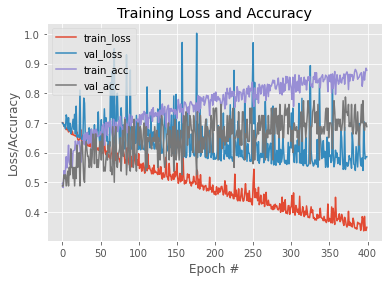

CNN Report
Accuracy 0.6875
              precision    recall  f1-score   support

       brush       0.63      0.87      0.73        39
        comb       0.81      0.51      0.63        41

    accuracy                           0.69        80
   macro avg       0.72      0.69      0.68        80
weighted avg       0.72      0.69      0.68        80

Confusion Matrx:
 [[34  5]
 [20 21]]


In [11]:
cnn.plot_history()
cnn.predict()
(a, b, c) = cnn.review()
print("CNN Report")
print("Accuracy", a)
print(b)
print("Confusion Matrx:\n", c)
